# Desafío - Expansiones basales

● Para realizar este desafío debes haber estudiado previamente todo el material disponibilizado correspondiente a la unidad.

● Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los requerimientos solicitados y sube el .zip en el LMS.

● Desarrollo desafío:
    
    ○ El desafío se debe desarrollar de manera Individual.
    
    ○ Para la realización del desafío necesitarás apoyarte del archivo Apoyo Desafío - Expansiones basales.

## Descripción

● Una aplicación interesante de los modelos predictivos es poder predecir propiedades de materiales compuestos a partir de diferentes combinaciones en el proceso y creación de estos.

● Para este desafío trabajaremos con un dataset que contiene diferentes medidas de materiales con los que se hace la mezcla de concreto.

● Nuestra tarea será utilizar estas medidas para predecir la capacidad de resistir fuerzas compresivas de vigas de concreto, a esta capacidad de soportar fuerzas que buscan reducir la superficie o volumen de un cuerpo se le conoce como fuerza compresiva.

## Ejercicio 1: Preparar el ambiente de trabajo

● Importe los módulos clásicos del trabajo en ciencia de datos.

● El archivo tiene el nombre compresive_strength_concrete.csv. Importe y genere estadísticas descriptivas.

● En esta actividad su tarea será predecir la fuerza compresiva del concreto a partir de las medidas en la mezcla, para esto, utilice un modelo aditivo generalizado de la librería pyGAM.

In [1]:
# importación de librerias
# librerias clasicas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import warnings
import missingno as msngo

# librerias de machine learning

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error
from pygam import LinearGAM, s

# otros

labelencoder = LabelEncoder()
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (20,10)
plt.style.use('seaborn-darkgrid')
import func as fx

In [2]:
# cargamos el archivos compresive_strength_concrete.csv en nuestro DataSet
df = pd.read_csv('compresive_strength_concrete.csv')
# visualizamos los primeros 10 registros del df
df.head(10)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [35]:
# generamos estadisticas descriptivas
df.describe()

,cement,blast_furnace,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


## Ejercicio 2: Descripción

● El vector objetivo tiene el nombre de Concrete compressive strength(MPa, megapascals)

● Los nombres de las variables son muy poco amigables, dado que contienen espacios, paréntesis y otros elementos difíciles de referenciar. Se sugiere (pero no se obliga) renombrar las variables o acceder a éstas mediante notación de índice iloc.

● Inspeccione el tipo de datos de la base de datos, fijándose en su naturaleza y distribución. Decide si es necesario normalizarlos/escalarlos.

In [3]:
# Limpieza de cararcteres en nombre de las variables, para eliminar espacios, mayusculas y parentesis
df.columns = df.columns.map(lambda x: str(x).lower().replace(' ', '_'))
df.columns = df.columns.map(lambda x: str(x).lower().replace('(', ''))
df.columns = df.columns.map(lambda x: str(x).lower().replace(')', ''))

In [4]:
# Cambio de nombres a variables
df = df.rename(columns={'cement_component_1kg_in_a_m^3_mixture':'cement',
                        'blast_furnace_slag_component_2kg_in_a_m^3_mixture':'blast_furnace',
                        'fly_ash_component_3kg_in_a_m^3_mixture':'fly_ash',
                        'water__component_4kg_in_a_m^3_mixture':'water',
                        'superplasticizer_component_5kg_in_a_m^3_mixture':'superplasticizer',
                        'coarse_aggregate__component_6kg_in_a_m^3_mixture':'coarse_aggregate',
                        'fine_aggregate_component_7kg_in_a_m^3_mixture':'fine_aggregate',
                        'age_day':'age',
                        'concrete_compressive_strengthmpa,_megapascals_':'concrete'})

df.head()

,cement,blast_furnace,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
# revisamos la dimensionalidad del dataset
print(f'''El dataset contiene
Numero de filas: {df.shape[0]}
Numero de columnas: {df.shape[1]}''')

El dataset contiene
Numero de filas: 1030
Numero de columnas: 9


<AxesSubplot:>

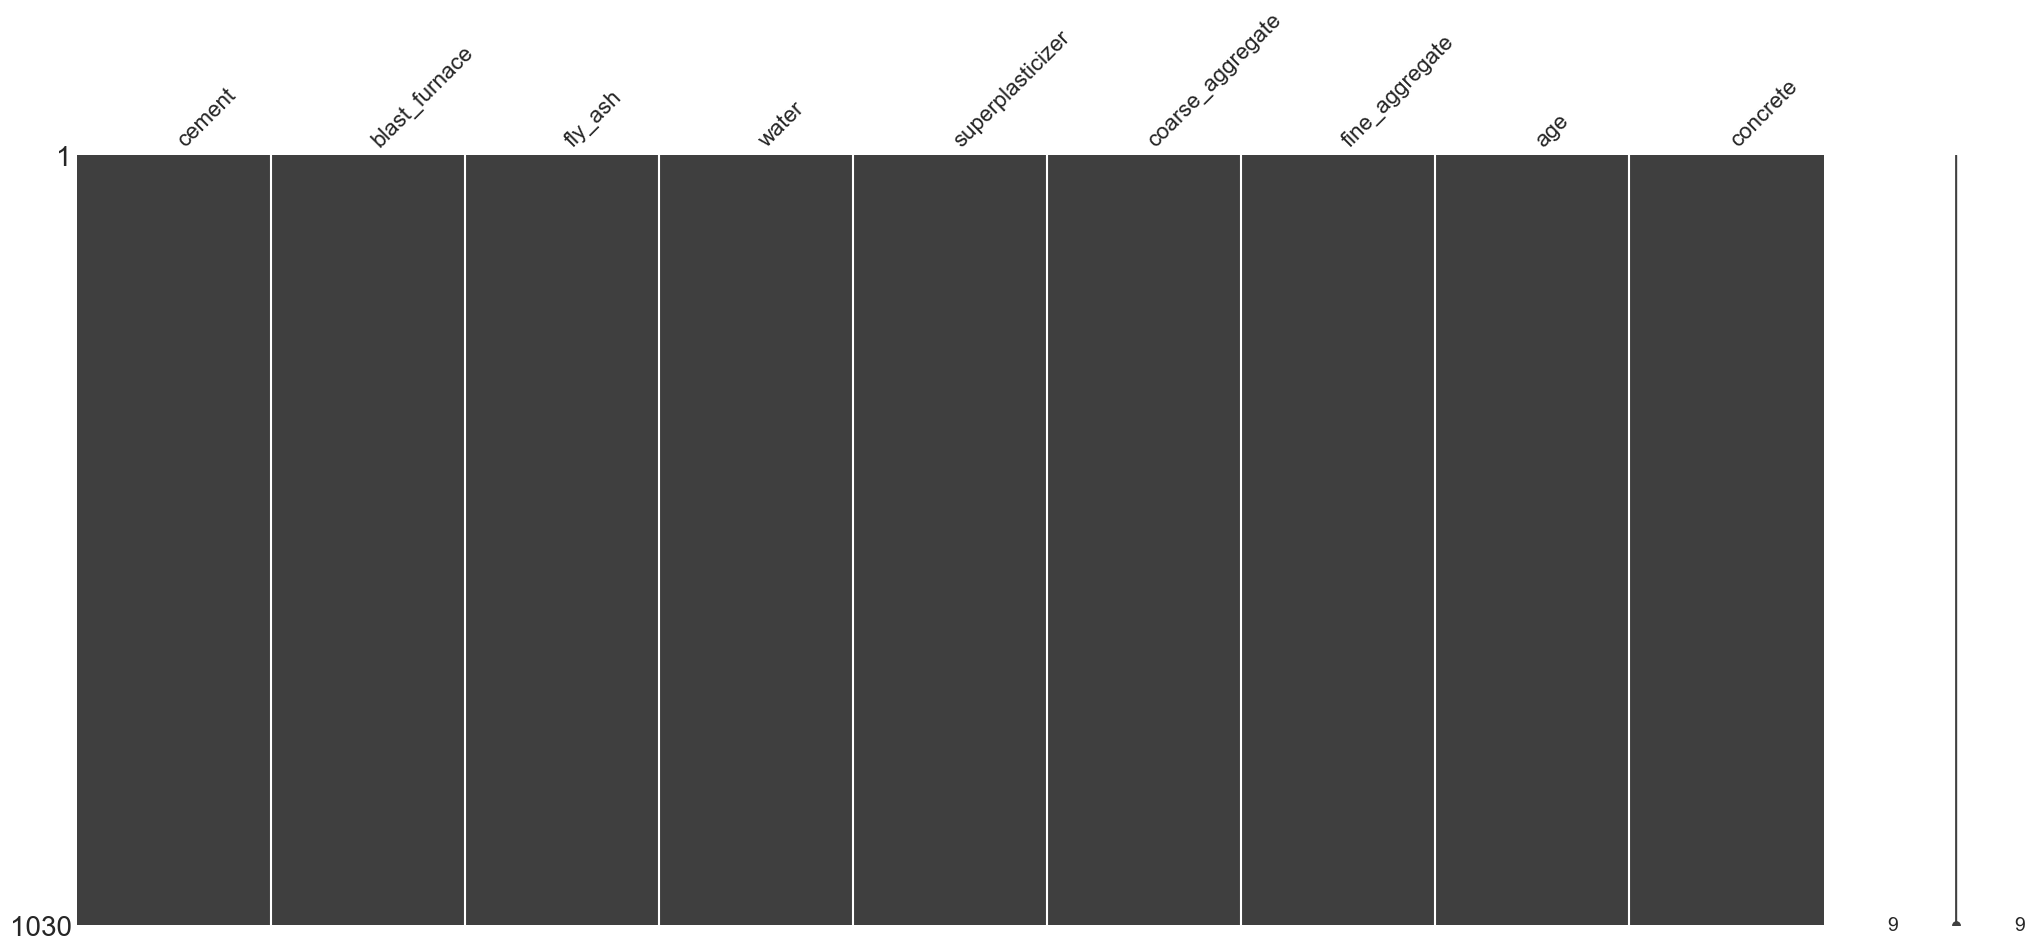

In [6]:
# revisamos que no existan datos perdidos
msngo.matrix(df)

In [7]:
# revisamos el tipo de datos de cada una de las columnas
df.dtypes

cement              float64
blast_furnace       float64
fly_ash             float64
water               float64
superplasticizer    float64
coarse_aggregate    float64
fine_aggregate      float64
age                   int64
concrete            float64
dtype: object

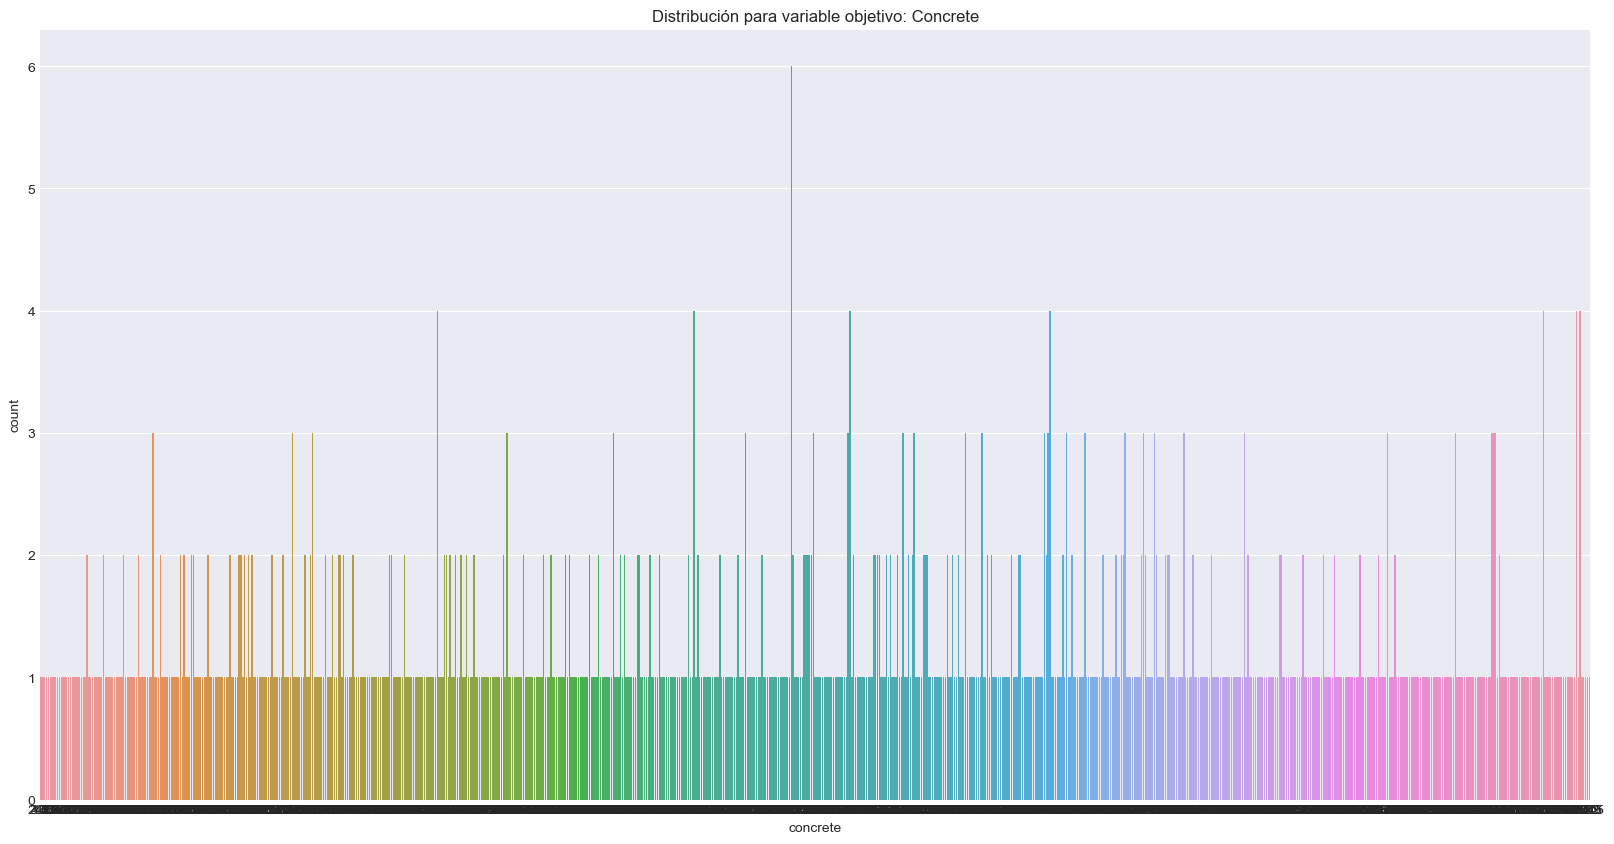

In [8]:
sns.countplot(x = df['concrete'])
plt.title(f'Distribución para variable objetivo: Concrete')
plt.show()

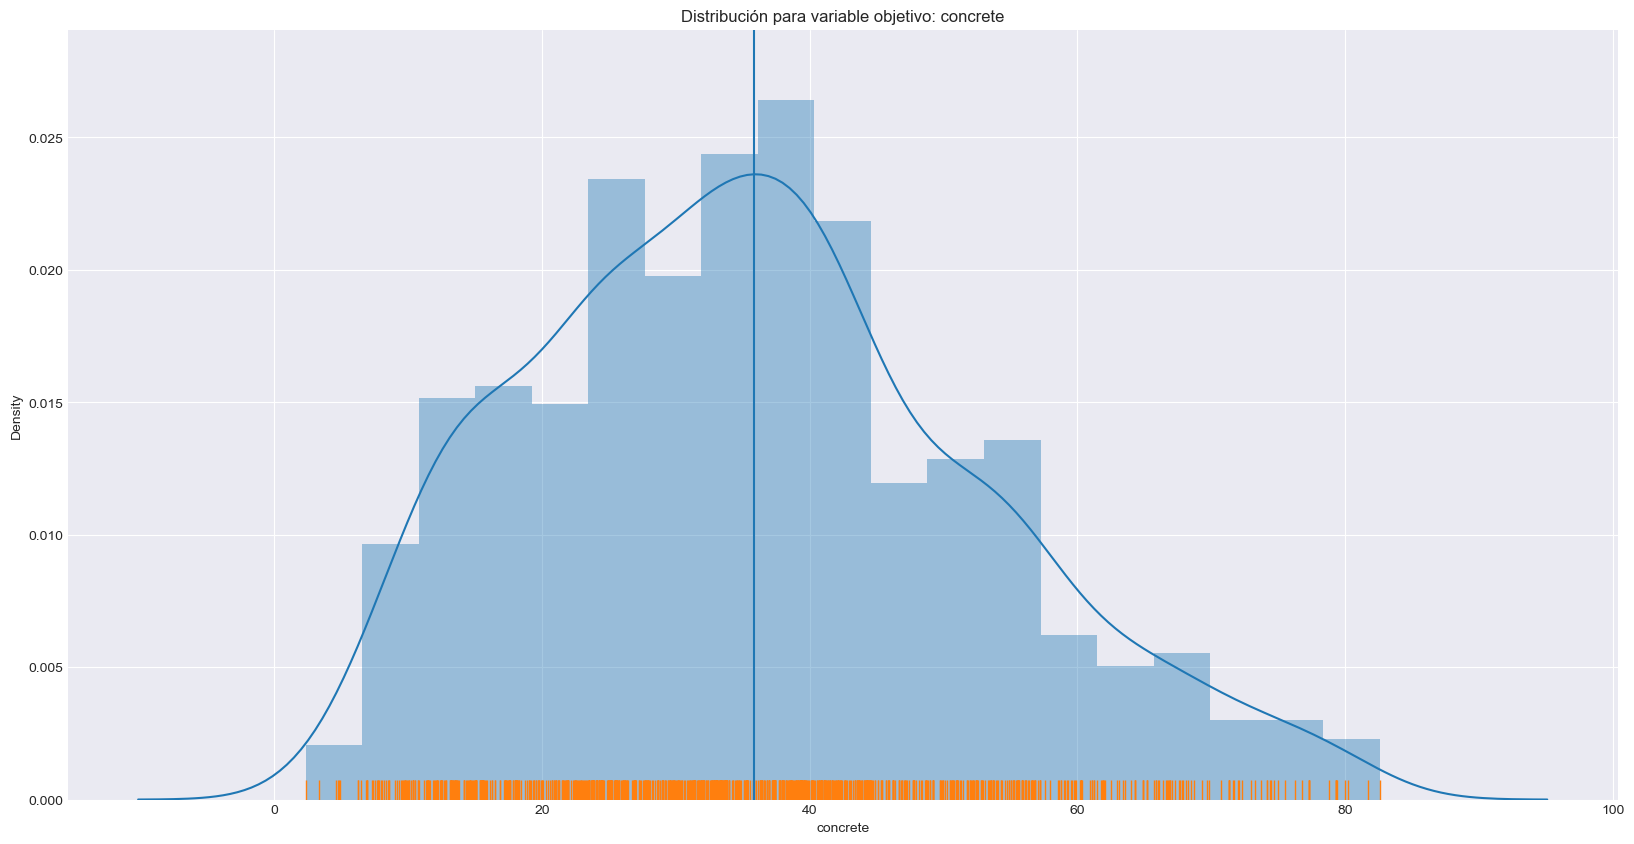

In [9]:
# Visualizacion distribucion vector objetivo
sns.distplot(x = df['concrete'])
sns.rugplot(x = df['concrete'])
plt.title(f'Distribución para variable objetivo: concrete')
plt.axvline(df['concrete'].mean())
plt.show()

In [10]:
# mostramos la composición del dataset, indicando en detalle cada una de las caracteristicas de las columnas.
fx.summary_drop(df)

,tipo,nulos,porc_nulos,ceros,porc_ceros,count,mean,std,min,25%,50%,75%,max,dist_IQR,limit_inf,limit_sup,outliers
age,int64,0,0.0,0,0.000000,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0,49.000,-66.5000,129.5000,59
cement,float64,0,0.0,0,0.000000,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0,157.625,-44.0625,586.4375,0
blast_furnace,float64,0,0.0,471,0.457282,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4,142.950,-214.4250,357.3750,2
fly_ash,float64,0,0.0,566,0.549515,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1,118.300,-177.4500,295.7500,0
water,float64,0,0.0,0,0.000000,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0,27.100,124.2500,232.6500,9
superplasticizer,float64,0,0.0,379,0.367961,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2,10.200,-15.3000,25.5000,10
coarse_aggregate,float64,0,0.0,0,0.000000,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0,97.400,785.9000,1175.5000,0
fine_aggregate,float64,0,0.0,0,0.000000,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6,93.050,591.3750,963.5750,5
concrete,float64,0,0.0,0,0.000000,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6,22.425,-9.9275,79.7725,4


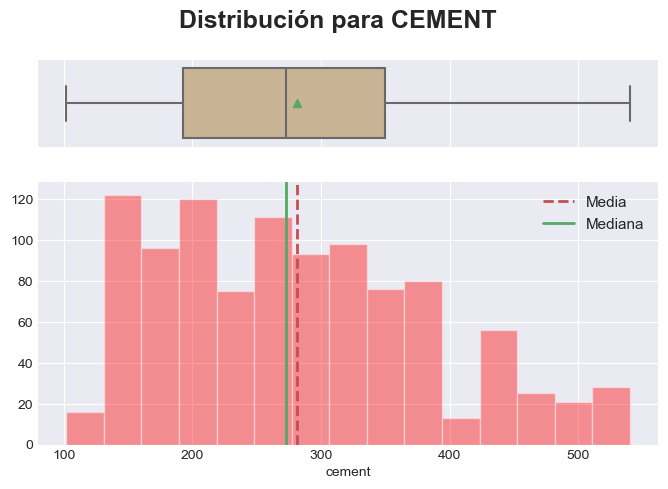

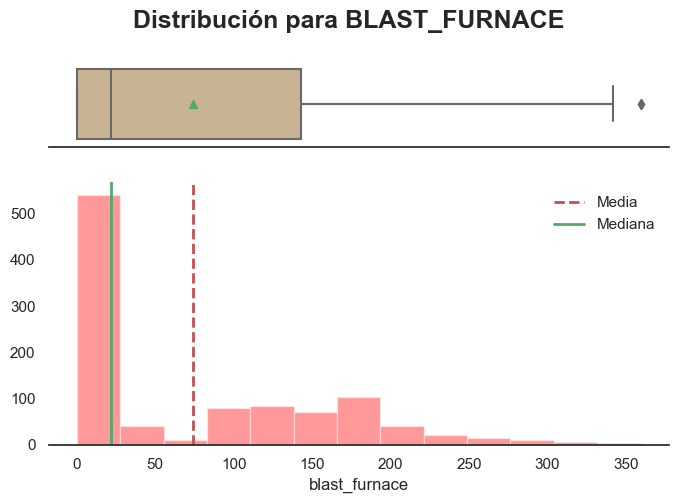

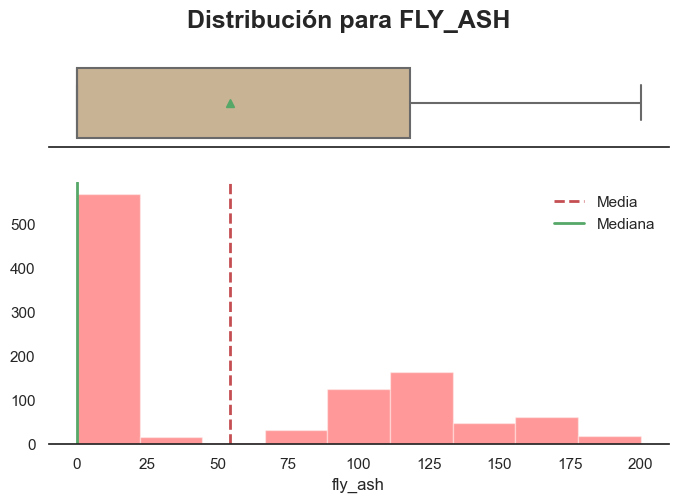

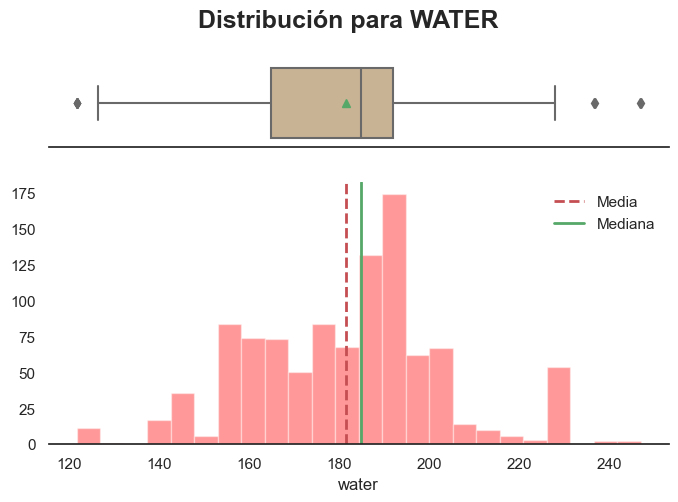

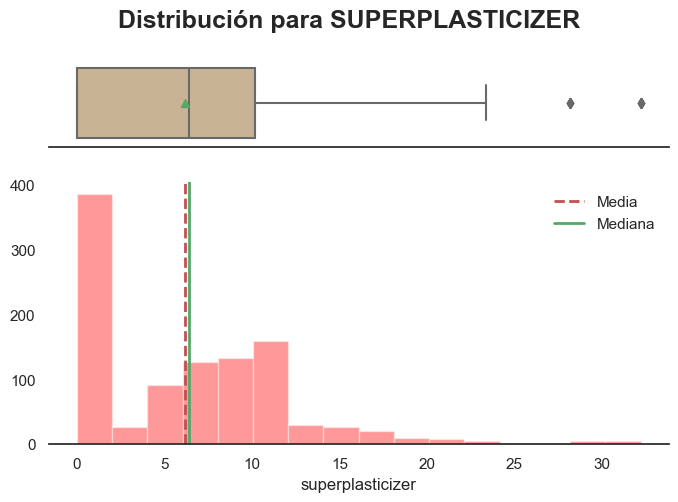

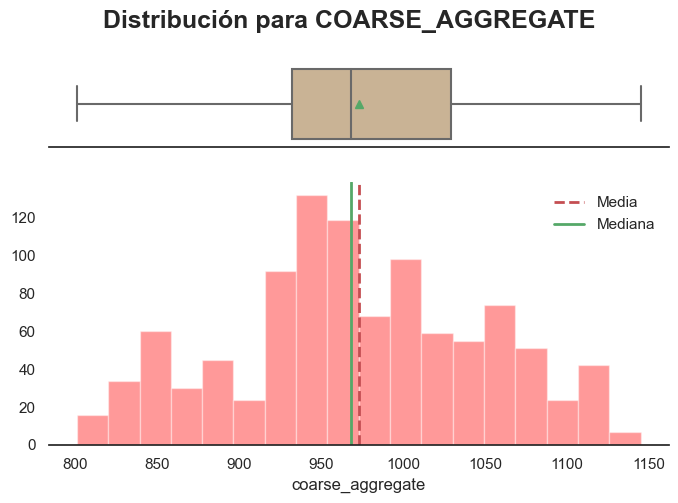

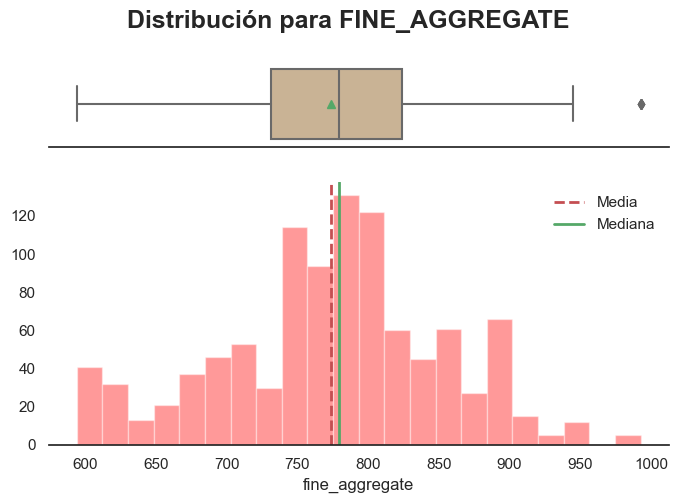

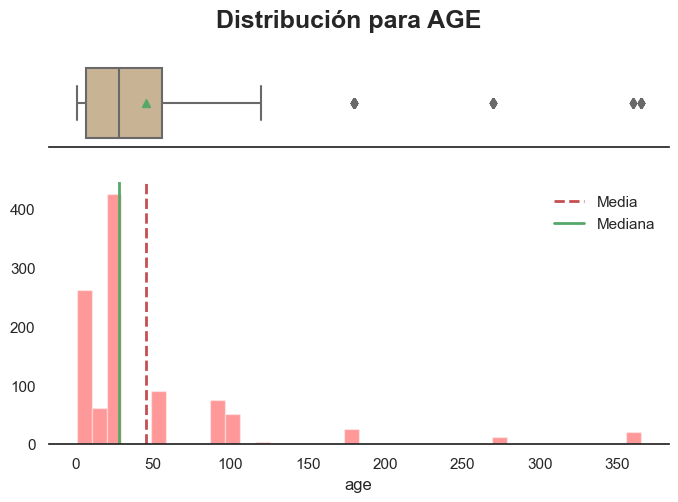

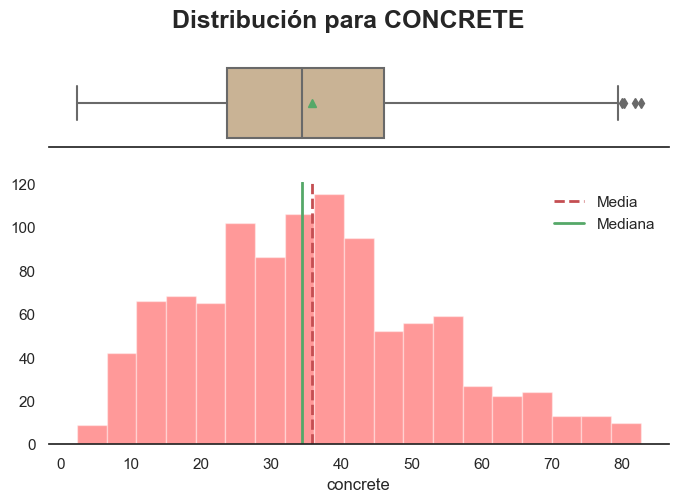

In [11]:
list_vars = ['cement', 'blast_furnace', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate', 'age', 'concrete']

for i in range(len(list_vars)):
        fx.dist_box(df[list_vars[i]])

## Ejercicio 3: Modelo
● En base al vector objetivo, decida el mejor modelo e importe con pygam. Condicional a esto, importe las métricas de desempeño asociadas.

● Genere conjuntos de entrenamiento y validación.

● Genere un primer modelo sin implementar la función gridsearch. Reporte el hiper parámetro lam así como las métricas de desempeño asociadas.

● Genere un segundo modelo implementando gridsearch en lambda con un logspace entre -3 y 3. Comente sobre el mejor hiper parámetro y sus métricas de desempeño.

In [12]:
fx.summary_drop(df)

,tipo,nulos,porc_nulos,ceros,porc_ceros,count,mean,std,min,25%,50%,75%,max,dist_IQR,limit_inf,limit_sup,outliers
age,int64,0,0.0,0,0.000000,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0,49.000,-66.5000,129.5000,59
cement,float64,0,0.0,0,0.000000,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0,157.625,-44.0625,586.4375,0
blast_furnace,float64,0,0.0,471,0.457282,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4,142.950,-214.4250,357.3750,2
fly_ash,float64,0,0.0,566,0.549515,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1,118.300,-177.4500,295.7500,0
water,float64,0,0.0,0,0.000000,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0,27.100,124.2500,232.6500,9
superplasticizer,float64,0,0.0,379,0.367961,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2,10.200,-15.3000,25.5000,10
coarse_aggregate,float64,0,0.0,0,0.000000,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0,97.400,785.9000,1175.5000,0
fine_aggregate,float64,0,0.0,0,0.000000,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6,93.050,591.3750,963.5750,5
concrete,float64,0,0.0,0,0.000000,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6,22.425,-9.9275,79.7725,4


In [13]:
# determinamos las columnas de forma aleatoria segun el analisis exploratorio
sub = df[['age','cement','water','coarse_aggregate','fine_aggregate','superplasticizer']]
X_train_pre, X_test_pre, y_train, y_test = train_test_split(sub, df['concrete'], test_size=.3, random_state=2404)

# ajustamos el estandarizador sobre el conjunto de entrenamiento (para que aprenda la media y desv. est.)
scaler = StandardScaler().fit(X_train_pre)

In [14]:
# con el estandarizador ajustamos sobre entrenamiento, transformamos el conjunto de entrenamiento con esta estandarizacion
X_train = pd.DataFrame(scaler.transform(X_train_pre), columns= X_train_pre.columns)

# transformamos el conjunto de pruebas con el estandarizador ajustado sobre entrenamiento
X_test = pd.DataFrame(scaler.transform(X_test_pre), columns= X_test_pre.columns)

In [15]:
lams = np.logspace(-3,3,3)

In [16]:
lams = [lams]*len(X_train.columns)

In [18]:
gam = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5), fit_intercept=True)

In [19]:
# Genere un primer modelo sin implementar la función gridsearch.
gam.fit(X_train, y_train)

LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + intercept, 
   tol=0.0001, verbose=False)

In [20]:
def report_metrics(model, x_test, y_test):
    preds = model.predict(x_test)
    print(f'Test R2: {r2_score(y_test, preds)}')
    print(f'Test MSE: {mean_squared_error(y_test,preds)}')
    print(f'Test Median Absolute Error: {median_absolute_error(y_test, preds)}')

In [24]:
print(f'Metricas para el primer modelo entregado con lambda: {gam.lam}\n')
report_metrics(gam,X_test, y_test)

Metricas para el primer modelo entregado con lambda: [[0.6], [0.6], [0.6], [0.6], [0.6], [0.6]]

Test R2: 0.7899847173807658
Test MSE: 46.20929435121017
Test Median Absolute Error: 4.319620614252408


In [25]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     62.5391
Link Function:                     IdentityLink Log Likelihood:                                 -3375.8656
Number of Samples:                          721 AIC:                                             6878.8094
                                                AICc:                                            6891.3029
                                                GCV:                                               50.4381
                                                Scale:                                             42.6296
                                                Pseudo R-Squared:                                   0.8715
Feature Function                  Lam

In [22]:
# Genere un segundo modelo implementando gridsearch
gam_2 = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5), fit_intercept=True)
gam_2.gridsearch(X_train.values, y_train.values, lam = lams)

  0% (0 of 729) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--
  0% (2 of 729) |                        | Elapsed Time: 0:00:00 ETA:   0:00:47
  0% (5 of 729) |                        | Elapsed Time: 0:00:00 ETA:   0:00:39
  1% (8 of 729) |                        | Elapsed Time: 0:00:00 ETA:   0:00:37
  1% (10 of 729) |                       | Elapsed Time: 0:00:00 ETA:   0:00:37
  1% (13 of 729) |                       | Elapsed Time: 0:00:00 ETA:   0:00:36
  2% (16 of 729) |                       | Elapsed Time: 0:00:00 ETA:   0:00:35
  2% (18 of 729) |                       | Elapsed Time: 0:00:00 ETA:   0:00:35
  2% (19 of 729) |                       | Elapsed Time: 0:00:00 ETA:   0:00:35
  2% (21 of 729) |                       | Elapsed Time: 0:00:01 ETA:   0:00:35
  3% (23 of 729) |                       | Elapsed Time: 0:00:01 ETA:   0:00:36
  3% (25 of 729) |                       | Elapsed Time: 0:00:01 ETA:   0:00:37
  3% (27 of 729) |                      

LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + intercept, 
   tol=0.0001, verbose=False)

In [40]:
print(f'Metricas para el segundo modelo entregado con lambda: {gam_2.lam}\n')
report_metrics(gam_2,X_test, y_test)

Metricas para el segundo modelo entregado con lambda: [[0.001], [1.0], [1.0], [1.0], [1.0], [1.0]]

Test R2: 0.8010016785225003
Test MSE: 43.785251710574144
Test Median Absolute Error: 3.9356905305213274


In [27]:
gam_2.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     61.9652
Link Function:                     IdentityLink Log Likelihood:                                 -3365.7616
Number of Samples:                          721 AIC:                                             6857.4536
                                                AICc:                                            6869.7135
                                                GCV:                                               49.6454
                                                Scale:                                             42.0295
                                                Pseudo R-Squared:                                   0.8732
Feature Function                  Lam

El segundo modelo presenta mejores resultados que el segundo mediante gridsearch

## Ejercicio 4: Dependencia Parcial

● En base al mejor modelo, reporte el comportamiento de la dependencia parcial de cada atributo.

● Para ello, genere una función que tenga como argumento de entrada el modelo estimado y devuelva una grilla con todos los gráficos de dependencia parcial.

● Reporte brevemente sobre qué atributos están asociados a mayores y menores. niveles de resistencia.

In [30]:
def dependencia_parcial(model):
    fig, axs = plt.subplots(2,3, figsize = (20,6));
    titles = X_train.columns
    for i, ax in enumerate(axs.flatten()):
        XX = model.generate_X_grid(term=i)
        ax.plot(XX[:,i], model.partial_dependence(term=i, X=XX))
        ax.plot(XX[:,i], model.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
        ax.scatter(X_train[titles[i]],
               [0] * len(X_train[titles[i]]),
               marker = '|', alpha = .5)
        ax.set_title(titles[i]);

In [37]:
report_metrics(gam, X_test, y_test)

Test R2: 0.7899847173807658
Test MSE: 46.20929435121017
Test Median Absolute Error: 4.319620614252408


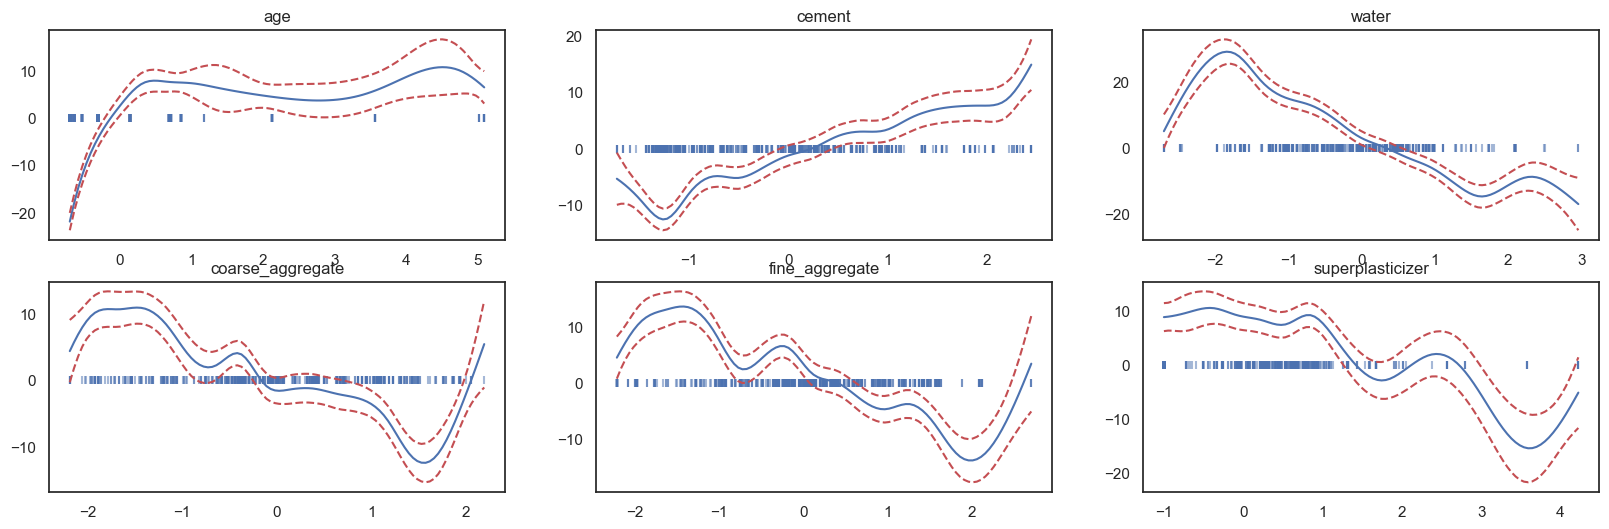

In [31]:
# dependencias parciales del primer modelo (gam sin gridsearch)
dependencia_parcial(gam)

In [39]:
report_metrics(gam_2, X_test, y_test)

Test R2: 0.8010016785225003
Test MSE: 43.785251710574144
Test Median Absolute Error: 3.9356905305213274


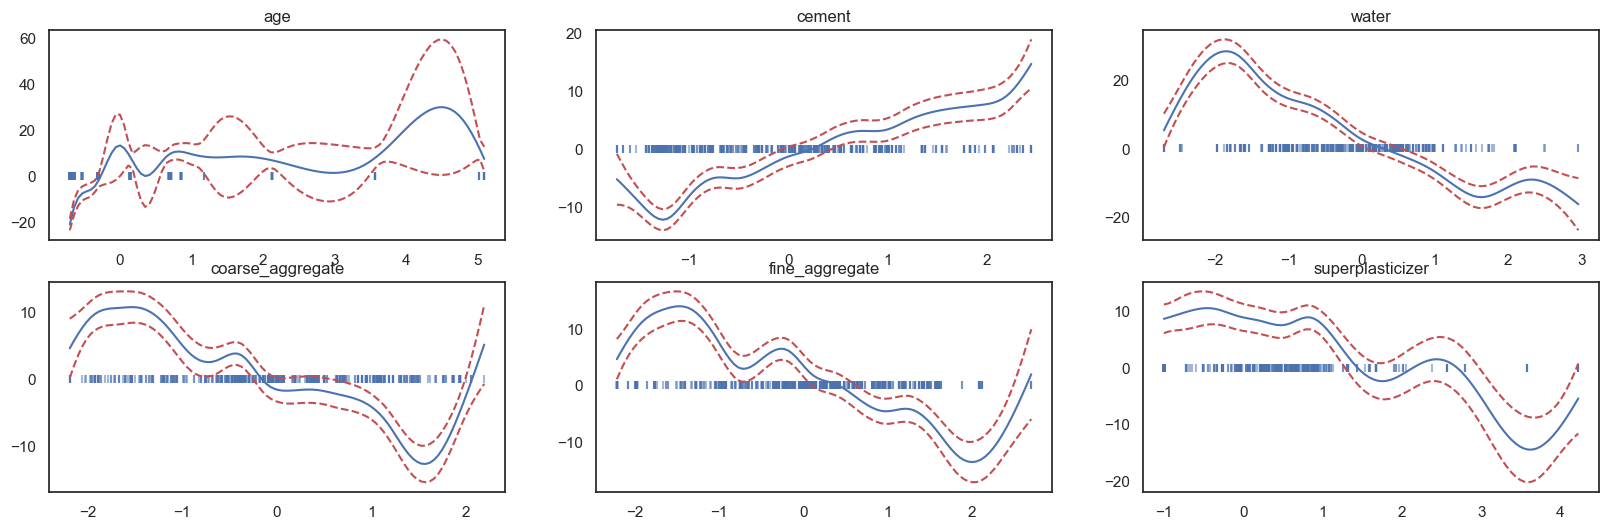

In [32]:
# dependencias parciales del segundo modelo (gam con gridsearch)
dependencia_parcial(gam_2)